In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
print("\nChecking for missing values and duplicates")
print(df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")

#Remove duplicate
df= df.drop_duplicates()
print(f"Dataset after removing duplicates: {df.shape}")


Checking for missing values and duplicates
Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64
Duplicate rows: 1024
Dataset after removing duplicates: (976, 26)


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
print(df.columns.isnull().sum())
df.dtypes

0


cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object


Numerical colums: Index(['stalk_height', 'cap_diameter'], dtype='object')
Categorical columns: Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

Step 3: Visualizing the data


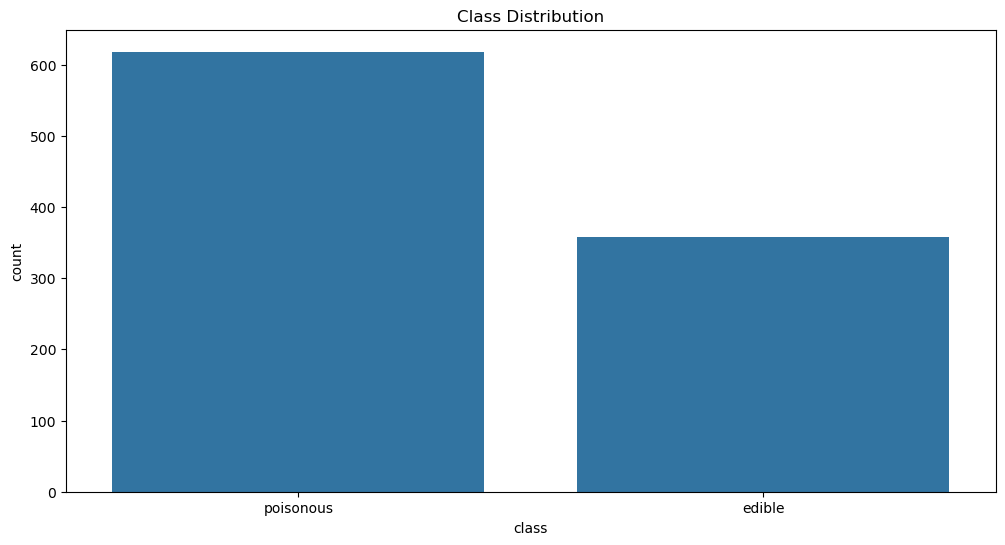

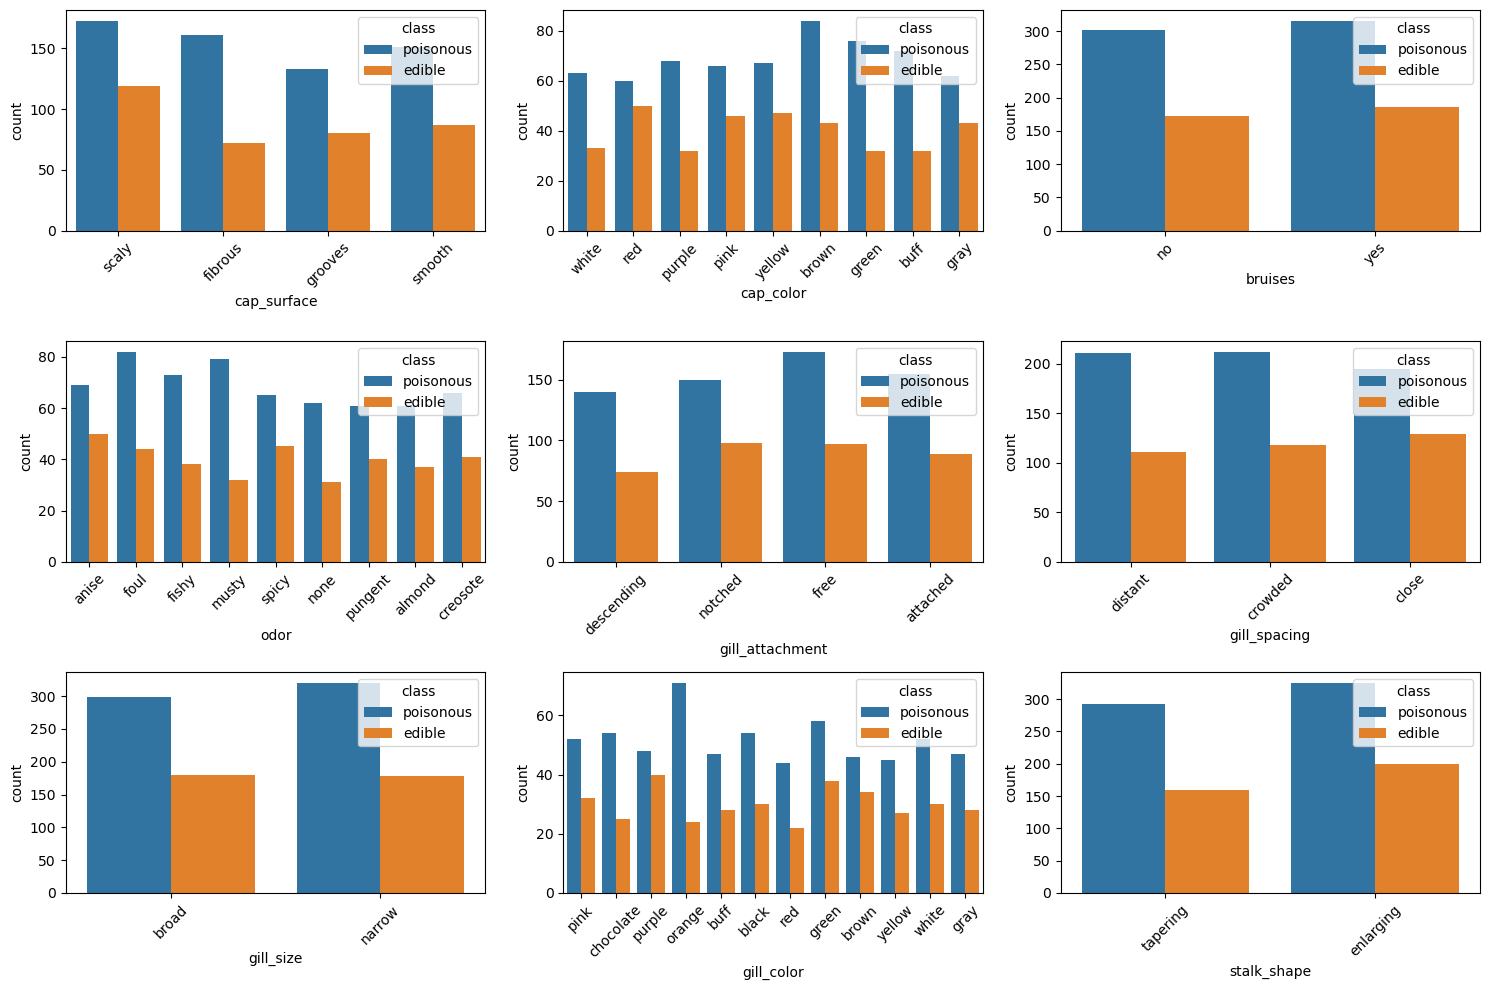

In [6]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_col = df.select_dtypes(include=['object']).columns
print("\nNumerical colums:",numerical_cols)
print("Categorical columns:",categorical_col)

print("\nStep 3: Visualizing the data")
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="class") #Class distribution (edible vs posisonous)
plt.title("Class Distribution")
plt.show()

#To examine feature distribution
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[1:10]):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x = col, hue="class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
#Apply label encoding to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_col:
    df[col]= label_encoder.fit_transform(df[col])

#Separate features and target
X = df.drop(columns=['class'])
y = df['class']

#Encode categorical features using One-Hot encoding
X_encoded = pd.get_dummies(X,drop_first=True) #Avoid multicollinearity
print("\nCategorical columns after one-hot encoding:\n",X_encoded.columns)

#Splt datset into trainign and testing
X_train,X_test, y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42,stratify=y)

#Display shapes of training and testing sets
print(f"\nTraning set: {X_train.shape}, Test set: {X_test.shape} ")



Categorical columns after one-hot encoding:
 Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter'],
      dtype='object')

Traning set: (780, 24), Test set: (196, 24) 


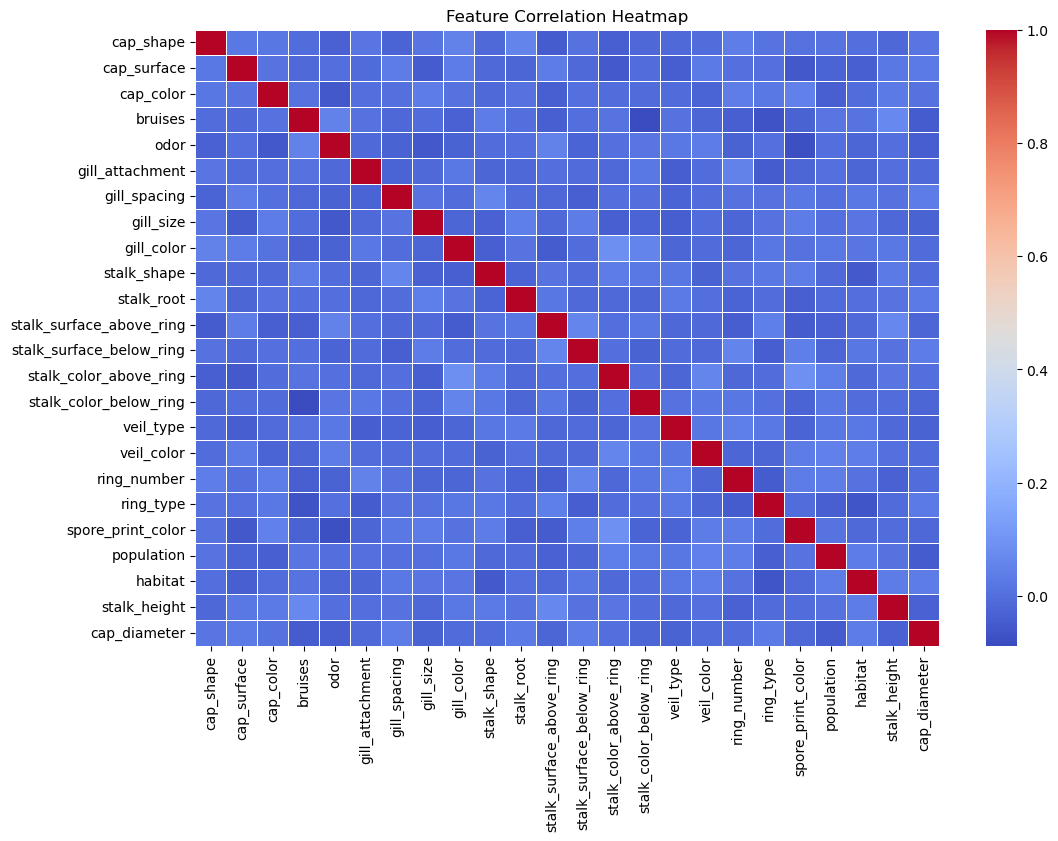

In [8]:
#Compute correlation
corr_matrix = X_encoded.corr()

#Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap='coolwarm',linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("Feature Correlation Heatmap.png",dpi=300)
plt.show()

In [9]:
#Initilization and train the SVM model
svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(X_train,y_train)

#Prediction
y_pred = svm_model.predict(X_test)

#Evaluation
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:",classification_report(y_test,y_pred))

color_map = {0: 'edible', 1: 'poisonous'}
y_pred_numeric = np.array([color_map[label] for label in y_pred])

#Reduce to 2D using PCA visualization of SVM results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

le= LabelEncoder()
y_pred_encoded = le.fit_transform(y_pred)



Accuracy: 0.6326530612244898

Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



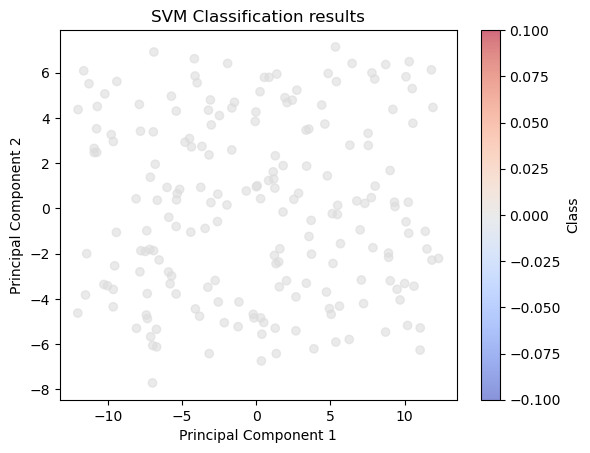

In [10]:
#Plot results
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred_encoded,cmap='coolwarm',alpha=0.6)
plt.title("SVM Classification results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("SVM Classification Results.png",dpi=300)
plt.colorbar(label='Class')
plt.show()



In [11]:
#Define hyperparameters to tune
param_grid = {
    'C':[0.1,1,10],
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale','auto'] 
    }

#Grid search
grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

#Best parameters
print("\nBest Parameters:",grid_search.best_params_)

#Evaluate best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("\nOptimized Accuracy:",accuracy_score(y_test,y_pred_best))

kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel,random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

print(f"\nKernel: {kernel}")
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nClassification report:",classification_report(y_test,y_pred))


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Optimized Accuracy: 0.6326530612244898

Kernel: sigmoid

Accuracy: 0.5510204081632653

Classification report:               precision    recall  f1-score   support

           0       0.38      0.33      0.35        72
           1       0.64      0.68      0.66       124

    accuracy                           0.55       196
   macro avg       0.51      0.51      0.50       196
weighted avg       0.54      0.55      0.54       196



•	Polynomial kernel performed better than sigmoid.
•	Sigmoid kernel struggled with both precision and recall, making it unreliable.
•	Edible mushrooms are misclassified often, which is risky.
•	Further tuning (adjusting C, gamma, or trying RBF kernel) might improve performance.

